## Trabajo practico N°3: Clasificadores
### Integrantes: Maxim Dorogov  

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    roc_auc_score
)
from matplotlib import pyplot as plt

In [9]:
dataset = pd.read_csv("dataset/spambase.csv") # Cargamos los datos desde un archivo CSV
dataset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


Graficamos el histograma de clases para ver la distribucion de las clases en el dataset.


<Axes: >

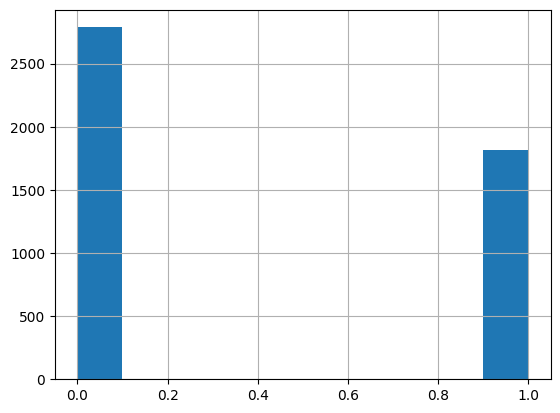

In [37]:
dataset['spam'].hist()

Podemos ver que hay cierto desbalance.

1. ¿Cuáles son las 10 palabras o símbolos más frecuentes en correos SPAM y en correos NO SPAM?
    1. ¿Hay palabras o símbolos en común?
    1. ¿Alguna resulta llamativa?

In [17]:
grouped_sum = dataset.groupby(by="spam", as_index=False).sum()
grouped_sum.head()

,spam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,0,204860,681569,559220,2470,504739,124190,26160,107100,106080,...,1159138,800669,22840,142820,140182,442116,63242,306634,32475,60536
1,1,276190,298510,732080,298550,931799,317050,499309,377360,308320,...,226790,26700,2210,3810,37299,197563,14864,931352,316328,143003


In [19]:
for spam_label, group in grouped_sum.iterrows():
    print(f"Top 10 words for {'spam' if spam_label else 'non-spam'}:")
    
    # Sort the word frequencies in descending order
    top_words = group.sort_values(ascending=False).head(10)
    
    # Print the top 10 words and their frequencies
    print(top_words)

Top 10 words for non-spam:
word_freq_you        3541702
word_freq_george     3527559
word_freq_hp         2496576
word_freq_will       1495268
word_freq_your       1223098
word_freq_hpl        1204398
word_freq_re         1159138
word_freq_edu         800669
word_freq_address     681569
word_freq_meeting     604460
Name: 0, dtype: int64
Top 10 words for spam:
word_freq_you         4105599
word_freq_your        2502597
word_freq_will         997100
word_freq_free         939790
word_freq_our          931799
char_freq_!            931352
word_freq_all          732080
word_freq_mail         635470
word_freq_email        578759
word_freq_business     521250
Name: 1, dtype: int64


Podemos observar que hay palabras en común entre los correos SPAM y NO SPAM. Algo que llama la atencion es como el signo de exclamacion (!) aparece unicamente en el top 10 de palabras para correos SPAM al igual que la palabra "free" (gratis en ingles).

2. Separe el conjunto de datos en un conjunto de entrenamiento (70%) y uno de prueba (30%).

In [11]:
# Separamos atributos y target
X = dataset.drop(columns="spam")
y = dataset["spam"]

# Separamos en test y train
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

# Escalado para regresion logistica
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertimos los arrays escalados a DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

3. Utilizando un clasificador de Bayes ingenuo, entrene el modelo con el conjunto de entrenamiento.

Como hay cierto desbalance en las clases y para variar respecto de los ejemplos vistos en clase utilizo `ComplementNB`

Defino una funcion para entrenar y hacer una evaluacion preliminar del modelo en terminos de `accuracy`.

In [38]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    model_name = model.__class__.__name__
    print(f"Train accuracy of {model_name}: {model.score(X_train, y_train):.4f}")
    print(f"Test accuracy of {model_name}: {model.score(X_test, y_test):.4f}")

In [39]:
model_nb = ComplementNB()
train_and_evaluate(model_nb, X_train, y_train, X_test, y_test)

Train accuracy of ComplementNB: 0.8658
Test accuracy of ComplementNB: 0.8617


Los valores obtenidos son similares entre si, lo que indica que hay una generalizacion por parte del modelo.

4. Utilizando un clasificador de Regresión Logística, entrene el modelo con el conjunto de entrenamiento (en este caso, normalice los datos).

In [40]:
model_logistic = LogisticRegression()
train_and_evaluate(
    model_logistic, X_train_scaled, y_train, X_test_scaled, y_test)

Train accuracy of LogisticRegression: 0.8820
Test accuracy of LogisticRegression: 0.8805


A partir de la evaluacion preliminar vemos que el modelo de Regresion Logistica performa mejor, en terminos de accuracy, que Naive Bayes.

5. Calcule la matriz de confusión en el conjunto de prueba para ambos modelos.
    1. ¿Qué tipo de error comete más cada modelo?
    2. ¿Cuál de los dos tipos de error considera más importante en este problema?

Matrix de confusion para regresion logistica:

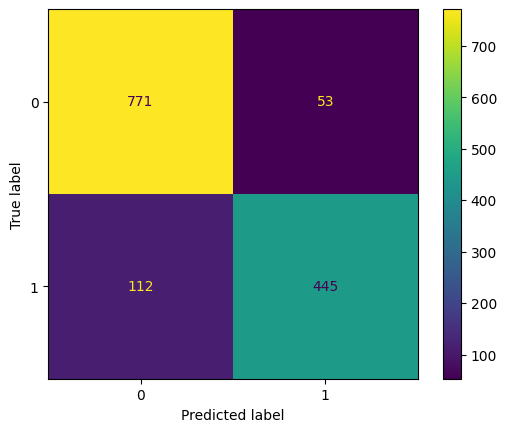

In [45]:
y_pred_logis = model_logistic.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logis)

Matrix de confusion para naive bayes:

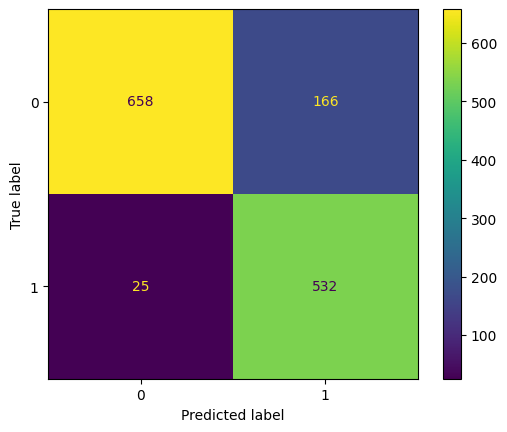

In [46]:
y_pred = model_nb.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

A partir del analisis de las matrices de confusion se puede observar que el modelo de regresion logistica comete mas errores al clasificar correos SPAM como NO SPAM. Y el modelo de Naive Bayes comete mas errores al clasificar correos NO SPAM como SPAM.

Es mas importante clasificar correctamente los correos NO SPAM, ya que al clasificar un correo NO SPAM como SPAM se pierde informacion que puede afectar al usuario. En cambio, clasificar un correo SPAM como NO SPAM puede no ser tan grave, ya que el usuario puede eliminarlo manualmente.

6. Calcule las métricas de precisión (precision) y recuperación (recall) para ambos modelos.
    1. ¿Cuál es el mejor modelo según cada métrica?
    1. ¿Cómo se relacionan estas métricas con los errores analizados en el punto anterior? Fundamente su respuesta.

In [53]:
print('--- Regresion Logistica ---')
print(classification_report(y_test, y_pred_logis, target_names=['no spam', 'spam']))

print('--- Naive Bayes ---')
print(classification_report(y_test, y_pred, target_names=['no spam', 'spam']))

--- Regresion Logistica ---
              precision    recall  f1-score   support

     no spam       0.87      0.94      0.90       824
        spam       0.89      0.80      0.84       557

    accuracy                           0.88      1381
   macro avg       0.88      0.87      0.87      1381
weighted avg       0.88      0.88      0.88      1381

--- Naive Bayes ---
              precision    recall  f1-score   support

     no spam       0.96      0.80      0.87       824
        spam       0.76      0.96      0.85       557

    accuracy                           0.86      1381
   macro avg       0.86      0.88      0.86      1381
weighted avg       0.88      0.86      0.86      1381



Si tomamos en cuenta el recall el modelo de regresion logistica es mejor que el modelo de Naive Bayes.

Las metricas de precision y recall para ambos modelos son consistentes con los errores analizados en el punto anterior. El modelo de regresion logistica tiene un recall mas alto que el modelo de Naive Bayes lo que indica que va a detectar la mayoria de los casos positivos como positivos, a cambio de tener una precision mas baja. 

7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

--- AUC ---
AUC for Logistic Regression: 0.9432
AUC for Naive Bayes: 0.8809


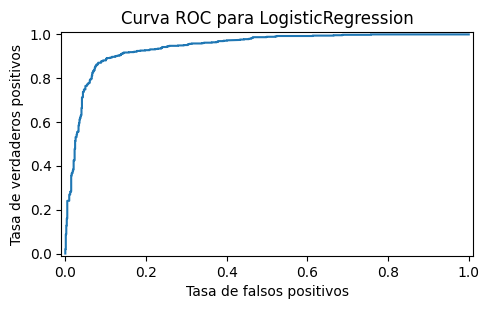

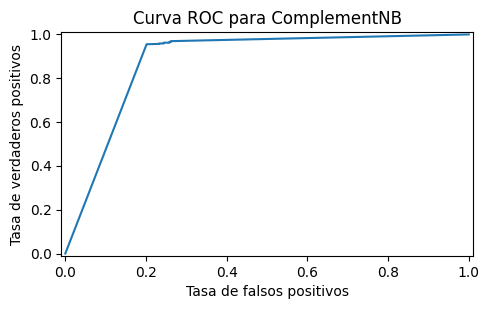

In [61]:
def plot_roc_curve(y, X, model):

    p_pred = model.predict_proba(X)
    fpr, tpr, _ = roc_curve(y, p_pred[:, 1])

    plt.figure(figsize=(5, 3))
    plt.plot(fpr, tpr)
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel("Tasa de falsos positivos")
    plt.ylabel("Tasa de verdaderos positivos")
    plt.tight_layout()
    plt.title(f"Curva ROC para {model.__class__.__name__}")
    

plot_roc_curve(y_test, X_test_scaled, model_logistic)
plot_roc_curve(y_test, X_test, model_nb)

print('--- AUC ---')
print(f"AUC for Logistic Regression: {roc_auc_score(y_test, model_logistic.predict_proba(X_test_scaled)[:, 1]):.4f}")
print(f"AUC for Naive Bayes: {roc_auc_score(y_test, model_nb.predict_proba(X_test)[:, 1]):.4f}")